PCA, Nearest-Neighbors Classification and Clustering
====================================================

This tour details [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (dimentionality reduction),

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dataset Loading
---------------
We use here the famous
[IRIS dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) of Fisher.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
 Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.


Helpers.

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

rand = np.random.permutation(X.shape[0])

X = X[rand]
y = y[rand]

In [5]:
k = y.max()+1  #no of classes
n = X.shape[0] #no of samples
d = X.shape[1] #dimensionality of data

print(n,d,k)

150 4 3


In [6]:
df = pd.DataFrame(np.c_[iris.data,iris.target], columns = iris.feature_names + ["species"])

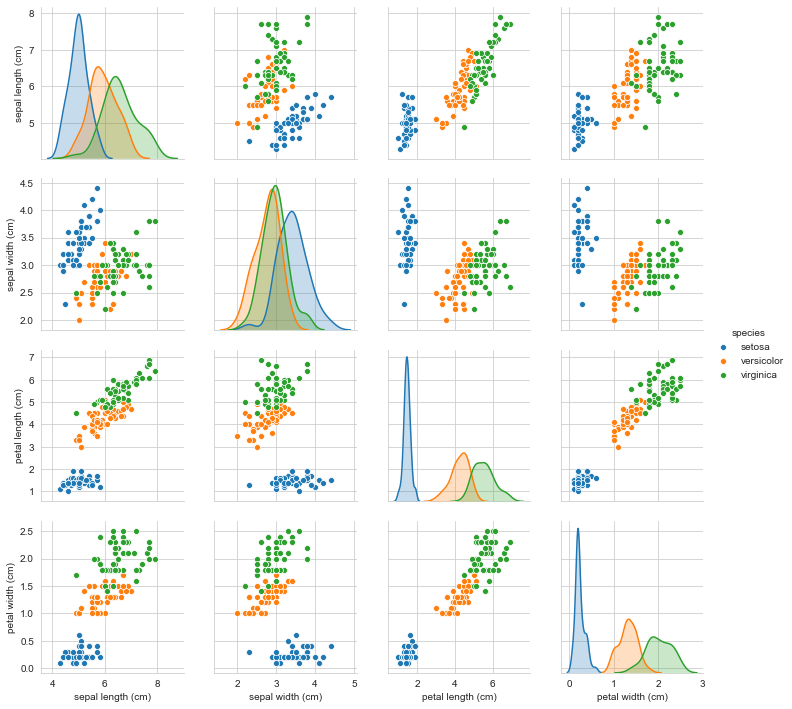

In [7]:
df["species"] = df["species"].map({0.0 : "setosa", 1.0 : "versicolor", 2.0 : "virginica"})
sns.set_style('whitegrid')
sns.pairplot(df, hue = "species")
plt.show()

In [8]:
df["species"] = df["species"].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})

Dimenionality Reduction and PCA
-------------------------------
In order to display in 2-D or 3-D the data, [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)
is needed.
The simplest method is the [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA),
which perform an
orthogonal linear projection on the principal axsis (eigenvector) of the
covariance matrix.


Compute [empirical mean](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)
$$    m = \frac{1}{n} \sum_{i=1}^n x_i \in \RR^p $$
and [covariance](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)
$$ C = \frac{1}{n} \sum_{i=1}^n (x_i-m) (x_i-m)^\top \in \RR^{p \times p}. $$
Denoting $\tilde X = X - 1_p m^\top $, one has $C=\tilde X^\top
\tilde X$.

In [9]:
def X_mean(X):
    return X-X.mean(axis = 0)

def Cov_X(X):
    return X_mean(X).transpose().dot(X_mean(X))

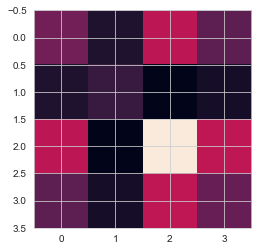

In [10]:
plt.imshow(Cov_X(X))

Compute PCA ortho-basis using the
[SVD decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)
$$ \tilde X = U \text{diag}(d) V  $$
where $U \in \RR^{n \times p}$ and $V \in \RR^{p \times p}$ have
orthonormal columns. $V$ are the principal directions of variance
 and
are order by decreasing variances.

In [11]:
U,D,V = np.linalg.svd(X)

In [12]:
print(U.shape)
print(D.shape)
print(V.shape)

(150, 150)
(4,)
(4, 4)


Compute the feature in the PCA basis, $z_i=V^\top (x_i-m) $, stored in matrix
format as $Z=\tilde X V$.

In [13]:
Z = X_mean(X).dot(V.transpose())

In [14]:
Z.shape

(150, 4)

Plot the singular values of the covariances, which corresponds to the standard deviation of the data
along the principal directions.

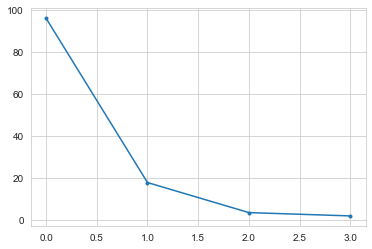

In [15]:
plt.plot(D, '.-')
plt.axis('tight');

The first dimensions of the $z_i$ are the optimal way to linearly
embed the data in a low dimensional space.
This can be used for display in 2-D using the first two dimension.

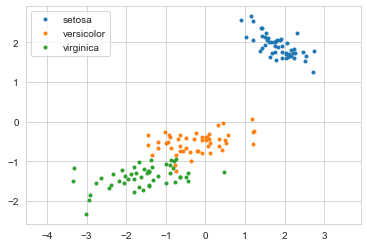

In [16]:
species = {0 : "setosa", 1 : "versicolor", 2 : "virginica"}
for i in np.arange(0,k):
    I = np.nonzero(y==i)[0]
    plt.plot(Z[I,0], Z[I,1], '.', label = str(species[i]))
plt.axis('tight') 
plt.axis('equal')
plt.legend(loc = "best");

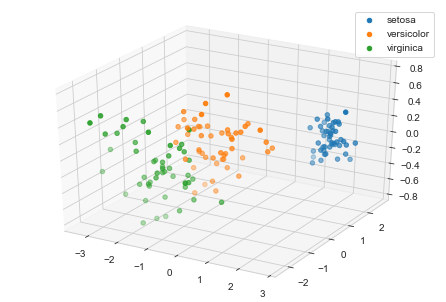

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
plt.clf
for i in np.arange(0,k):
    I = np.where(y==i)
    ax.scatter(Z[I,0], Z[I,1], Z[I,2], '.', label = str(species[i])) 
plt.legend();